# NAME: RAJA HAIDER ALI
# CMS ID: 346900
# CLASS: BESE 11-A

# CS-405 Deep Learning BS-CS/SE Fall-2023

# Lab 4 Starter Notebook

# Dataset
The given dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. We will be using only 7000 of the 20,000 images. The dataset in this assignment is going to be used on the following task:

## Given the pixels of an image, perform ethnicity classification for the image using a fully connected neural network.


The dataset for this lab is already cleaned and provided in a CSV format for you with images included as pixel values.

The 4 columns contain the following information:


* **[age]** is an integer from 0 to 116, indicating the age. You can convert it to float for regression predictions
* **[gender]** is either 0 (male) or 1 (female)
* **[race]** is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
*  The 4th column contains the pixels of the images flattened to a single dimension. Each of the original image is of size 48x48 and the flattened image vector consists of 48x48 = 2304 pixel values.

## You would be only using the Ethnicity Labels for your task and discard the Age and Gender labels for this lab.

In [1]:
!gdown https://drive.google.com/file/d/1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno/view?usp=sharing --fuzzy

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1_KRWsOhQNf6BZcdu4pg2JVy-lHo7_Cno 



In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Lets use pandas to load our data
df = pandas.read_csv("/content/DL_assignment1_dataset.csv")
df

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


### For this assignment we will be using fully connected neural networks and hence to keep things simple we will only use 7000 of the ~20000 images for quick training times.

### Please do not change the seed for the sampling of data points.

In [4]:
random_seed = 42
df_sampled = df.sample(n=7000, random_state=random_seed)
df_sampled.reset_index(drop=True, inplace=True)
df_sampled

,age,ethnicity,gender,pixels
0,49,1,1,31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...
1,39,1,0,186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...
2,8,4,0,20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...
3,40,4,0,6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...
4,27,0,0,31 31 29 51 98 136 162 175 176 178 178 179 184...
...,...,...,...,...
6995,49,3,0,128 130 131 131 132 134 134 140 72 43 102 77 1...
6996,28,1,1,28 22 19 23 16 22 19 31 64 81 88 96 108 120 13...
6997,32,3,1,221 229 227 200 166 115 146 198 186 184 178 15...
6998,41,0,0,58 61 76 58 83 71 74 90 71 112 77 91 111 135 1...


Let us take a look at an image. You will get an idea of how to process your data for your neural network.

The 4th column contains all the pixel values in a string for each image. Lets convert all the strings to arrays first.

In [5]:
def string_to_array(pixel_string):
    pixel_list = pixel_string.split()
    pixel_array = np.array([int(value) for value in pixel_list])
    return pixel_array

In [6]:
df_sampled['pixels'] = df_sampled['pixels'].apply(string_to_array)

In [7]:
df_sampled['pixels']

0       [31, 32, 28, 27, 34, 38, 37, 40, 47, 51, 52, 5...
1       [186, 65, 38, 40, 36, 51, 64, 64, 60, 55, 58, ...
2       [20, 23, 35, 34, 45, 65, 69, 72, 79, 92, 106, ...
3       [6, 6, 13, 19, 15, 23, 41, 76, 106, 125, 133, ...
4       [31, 31, 29, 51, 98, 136, 162, 175, 176, 178, ...
                              ...                        
6995    [128, 130, 131, 131, 132, 134, 134, 140, 72, 4...
6996    [28, 22, 19, 23, 16, 22, 19, 31, 64, 81, 88, 9...
6997    [221, 229, 227, 200, 166, 115, 146, 198, 186, ...
6998    [58, 61, 76, 58, 83, 71, 74, 90, 71, 112, 77, ...
6999    [19, 21, 20, 23, 33, 54, 90, 128, 149, 169, 17...
Name: pixels, Length: 7000, dtype: object

Our "pixels" column has been converted to arrays which we can now use as input features to our model

Lets show the first image of our dataset

Age: 28
Ethnicity: 3
Gender: 0


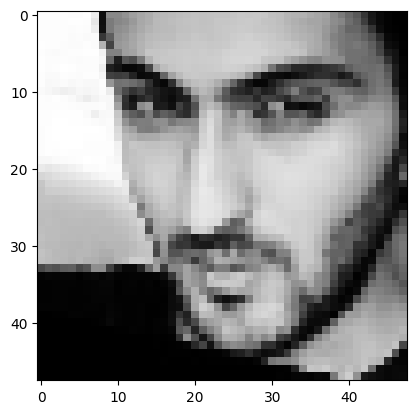

In [8]:
index = 30
first_image = df_sampled['pixels'][index]
image = first_image.reshape((48,48))
print("Age: "+str(df_sampled["age"][index])+"\nEthnicity: "+str(df_sampled["ethnicity"][index])+ "\nGender: "+str(df_sampled["gender"][index]))
plt.imshow(image,cmap="gray")

Uptill now, an initial processing has already been done using pandas in this starter code jupyter notebook. Hence you have a data frame ready for your assignment.

Please use the dataframe "df_sampled".

# You should consult the Lab 4 document provided to you for the tasks that are needed to be done for the successful completion. Grading rubricks are also mentioned in detail there.



In [9]:
# Write any further imports you need here
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Dataset Creation and Data Splitting (10 points):

In [10]:
# Drop the columns that aren't required
cols_to_drop = ["age", "gender"]
df_sampled.drop(cols_to_drop, axis=1, inplace=True)
df_sampled

,ethnicity,pixels
0,1,"[31, 32, 28, 27, 34, 38, 37, 40, 47, 51, 52, 5..."
1,1,"[186, 65, 38, 40, 36, 51, 64, 64, 60, 55, 58, ..."
2,4,"[20, 23, 35, 34, 45, 65, 69, 72, 79, 92, 106, ..."
3,4,"[6, 6, 13, 19, 15, 23, 41, 76, 106, 125, 133, ..."
4,0,"[31, 31, 29, 51, 98, 136, 162, 175, 176, 178, ..."
...,...,...
6995,3,"[128, 130, 131, 131, 132, 134, 134, 140, 72, 4..."
6996,1,"[28, 22, 19, 23, 16, 22, 19, 31, 64, 81, 88, 9..."
6997,3,"[221, 229, 227, 200, 166, 115, 146, 198, 186, ..."
6998,0,"[58, 61, 76, 58, 83, 71, 74, 90, 71, 112, 77, ..."


In [11]:
type(df_sampled["pixels"].values)

numpy.ndarray

In [12]:
type(df_sampled["pixels"].values[0][0])

numpy.int64

In [13]:
# Creating seperate list of  the feature and label columns
X = df_sampled['pixels'].tolist()
y = df_sampled['ethnicity'].tolist()

# normalizing X
X = [(pixel_array - np.min(pixel_array)) / (np.max(pixel_array) - np.min(pixel_array)) for pixel_array in X]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

print("Train set length:", len(X_train))
print("Validation set length:", len(X_val))
print("Test set length:", len(X_test))

Train set length: 4900
Validation set length: 1050
Test set length: 1050


In [14]:
type(y_train)

list

In [15]:
# function to convert the arrays to PyTorch tensors
def convert_to_tensors(X,y):

    # Convert pixel lists to PyTorch tensors
    X_tensor = [torch.tensor(x, dtype=torch.float32) for x in X]

    # Convert ethnicity to PyTorch tensors
    y_tensor = torch.tensor(y, dtype=torch.int64)

    return X_tensor, y_tensor

In [16]:
X_train,y_train = convert_to_tensors(X_train,y_train)
X_val,y_val = convert_to_tensors(X_val,y_val)
X_test,y_test = convert_to_tensors(X_test,y_test)

In [17]:
# Convert your X_train, X_test, and X_val lists of tensors into a single tensor
X_train= torch.stack(X_train)
X_test = torch.stack(X_test)
X_val = torch.stack(X_val)

In [18]:
# Create datasets for train, test, and validation sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
val_dataset = TensorDataset(X_val, y_val)

# Define batch size
batch_size = 64

# Create DataLoader for train, test, and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Part 2: Building a Fully Connected Neural Network (40 points)
1. Neural Network Architecture (20 points)
2. Model Training (10 Points)
3. Performance Monitoring (10 Points)

In [19]:
# Building a Fully Connected Neural Network
# 3 Hidden layers  with reLU activations and 1 output layer with softmax activation
class EthnicityClassifier(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2,hidden_size_3, num_classes, l2_reg = 0.001):
        super(EthnicityClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, hidden_size_3)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size_3, num_classes)
        self.softmax = nn.Softmax(dim=1)
        # L2 regularization parameter
        self.l2_reg = l2_reg


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x
    def l2_regularization_loss(self):
        l2_loss = 0.0
        for param in self.parameters():
            l2_loss += torch.norm(param, p=2)  # L2 norm regularization
        return self.l2_reg * l2_loss

In [20]:
# Initialize the model, loss function, and optimizer
# Hyperparameter setting
input_size = len(X_train[0])
hidden_size_1 = 512
hidden_size_2 = 256
hidden_size_3 = 128
num_classes = len(y_train.unique())
model = EthnicityClassifier(input_size, hidden_size_1, hidden_size_2, hidden_size_3, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [21]:
# Train function
def train(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels) + model.l2_regularization_loss()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    return train_loss, train_accuracy

In [22]:
# Evaluation function
def evaluate(model, val_loader, criterion):
    model.eval() # setting model to evaluation mode. Turning of the gradient monitoring and other functions not requried during evaluation
    # initializing the loss values to keep track of the history of the model to be plotted later
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    # torch.no_grad() sets the require_grad to False, which turns off gradient trackign to save memory
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    return val_loss, val_accuracy


In [23]:
# Training and testing loop
num_epochs = 150
train_losses, val_losses, train_acc, val_acc = [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer)
    val_loss, val_accuracy = evaluate(model, val_loader, criterion)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}] '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}% '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')


Epoch [1/150] Train Loss: 1.5113, Train Acc: 43.41% Val Loss: 1.4804, Val Acc: 41.43%
Epoch [2/150] Train Loss: 1.4814, Train Acc: 43.49% Val Loss: 1.4684, Val Acc: 41.62%
Epoch [3/150] Train Loss: 1.4635, Train Acc: 45.73% Val Loss: 1.4455, Val Acc: 44.95%
Epoch [4/150] Train Loss: 1.4369, Train Acc: 49.16% Val Loss: 1.4191, Val Acc: 49.33%
Epoch [5/150] Train Loss: 1.4156, Train Acc: 51.20% Val Loss: 1.4053, Val Acc: 50.29%
Epoch [6/150] Train Loss: 1.3943, Train Acc: 53.59% Val Loss: 1.3888, Val Acc: 50.95%
Epoch [7/150] Train Loss: 1.3861, Train Acc: 54.24% Val Loss: 1.3834, Val Acc: 51.90%
Epoch [8/150] Train Loss: 1.3792, Train Acc: 54.80% Val Loss: 1.3885, Val Acc: 51.43%
Epoch [9/150] Train Loss: 1.3802, Train Acc: 54.65% Val Loss: 1.3775, Val Acc: 52.00%
Epoch [10/150] Train Loss: 1.3729, Train Acc: 55.22% Val Loss: 1.3752, Val Acc: 52.19%
Epoch [11/150] Train Loss: 1.3672, Train Acc: 55.76% Val Loss: 1.3746, Val Acc: 51.90%
Epoch [12/150] Train Loss: 1.3654, Train Acc: 55.86%

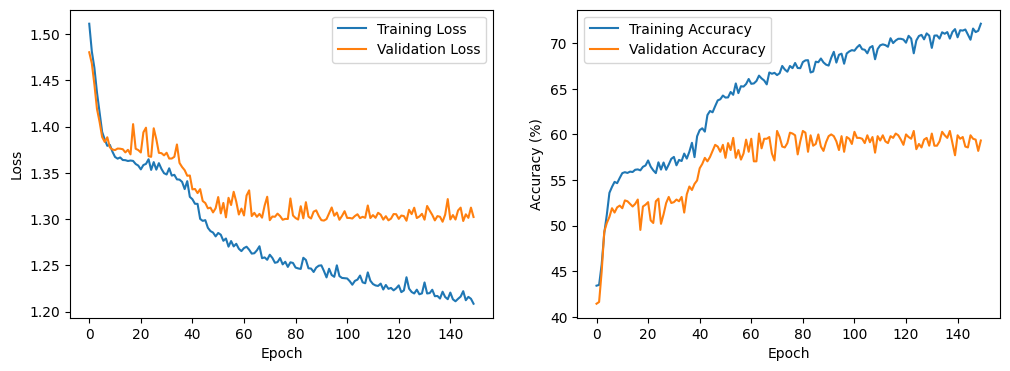

In [24]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

# Part 3: Evaluation (30 points)
1. Classification Evaluation

In [25]:
# puts model in testing mode
model.eval()

# initializing loss varaibles which will help in plotting the data later
test_loss = 0.0
test_correct = 0
test_total = 0
predicted_labels = []
true_labels = []

# turns off the gradient tracking
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        predicted_labels.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

test_loss /= len(test_loader)
test_accuracy = 100 * test_correct / test_total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Test Loss: 1.2917, Test Accuracy: 60.57%


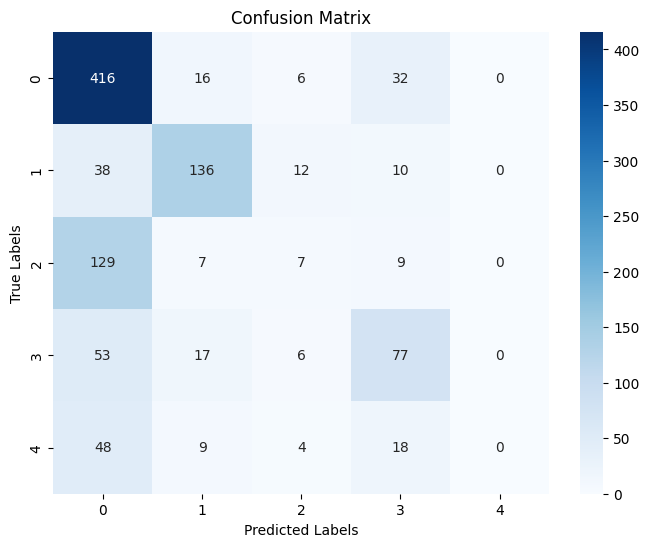

In [26]:
# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(num_classes)),
            yticklabels=list(range(num_classes)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()